In [1]:
library(picante)

Loading required package: ape

Loading required package: vegan

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6

Loading required package: nlme



In [5]:
load("R_biodiversity_workspace.RData")

In [9]:
rownames(comm)

[1] "mix-O-1"  "mix-O-2"  "mix-O-3"  "mix-O-4"  "mix-O-5"  "mix-O-6" 
 [7] "mix-O-7"  "fes-K-8"  "fes-K-9"  "fes-K-10" "fes-K-11" "fes-K-12"
[13] "fes-K-13" "fes-K-14" "fes-K-15" "fes-K-16" "fes-K-17" "mix-H-18"
[19] "mix-H-19" "mix-H-20" "mix-H-21" "mix-H-22" "mix-H-23" "mix-H-24"
[25] "mix-H-25" "mix-H-26" "mix-H-27"

#viewing the first five rows/columns

In [10]:
comm[1:5, 1:5]

,Antennaria_parvifolia,Artemisia_cana,Artemisia_frigida,Symphyotrichum_ericoides_var._ericoides,Bouteloua_gracilis
mix-O-1,10,10,50,10,70
mix-O-2,0,10,50,10,90
mix-O-3,20,20,30,10,60
mix-O-4,0,0,0,0,90
mix-O-5,0,10,0,0,100


#Checking abundance in each sample

Each cell contains the percent cover of a species in a sample. Many multivariate methods are sensitive to the total abundance in a sample, so we convert these absolute abundance estimates to a relative abundance estimate. We can do this with a function from the vegan package.

In [13]:
apply(comm, 1, sum)

mix-O-1  mix-O-2  mix-O-3  mix-O-4  mix-O-5  mix-O-6  mix-O-7  fes-K-8 
     640      630      710      350      400      650      560      960 
 fes-K-9 fes-K-10 fes-K-11 fes-K-12 fes-K-13 fes-K-14 fes-K-15 fes-K-16 
     960      980      830      980      980      830      640     1080 
fes-K-17 mix-H-18 mix-H-19 mix-H-20 mix-H-21 mix-H-22 mix-H-23 mix-H-24 
     710      440      590      540      340      420      400      600 
mix-H-25 mix-H-26 mix-H-27 
     540      590      420

#Turn percent cover to relative abundance by dividing each value by sample
#total abundance

In [14]:
comm <- decostand(comm, method = "total")
# check total abundance in each sample
apply(comm, 1, sum)

mix-O-1  mix-O-2  mix-O-3  mix-O-4  mix-O-5  mix-O-6  mix-O-7  fes-K-8 
       1        1        1        1        1        1        1        1 
 fes-K-9 fes-K-10 fes-K-11 fes-K-12 fes-K-13 fes-K-14 fes-K-15 fes-K-16 
       1        1        1        1        1        1        1        1 
fes-K-17 mix-H-18 mix-H-19 mix-H-20 mix-H-21 mix-H-22 mix-H-23 mix-H-24 
       1        1        1        1        1        1        1        1 
mix-H-25 mix-H-26 mix-H-27 
       1        1        1

# Trait Data
information on the leaf and root traits of each species.
species is in the rows and traits is in the columns.

In [77]:

traits <- read.csv("grassland_data/species.traits.csv", header = TRUE, row.names = 1)
head(traits)

,SLA,LeafArea,LeafThickness,SLV,LeafTissueDens,SRL,SRV,RootTissueDens,RootDiam
Achillea_millefolium,140.2663,9.275390,0.4163333,59.56525,0.018085428,74.14570,5.038776,0.2553510,0.3123600
Allium_textile,137.7006,2.445361,0.9147222,125.69496,0.008137136,187.85485,14.013757,0.1049986,0.3107833
Amelanchier_alnifolia,156.1014,14.064856,0.2900000,45.45227,0.022841232,20.87560,2.518939,0.5039683,0.3760667
Androsace_occidentalis,257.2050,0.274745,0.2535000,84.22189,0.017706402,207.45582,3.291592,0.4071078,0.1148714
Antennaria_neglecta,171.0442,1.731990,0.2810000,48.14442,0.020920233,124.73397,6.710526,0.1593750,0.2749500
Antennaria_parvifolia,193.8718,0.317200,0.2466667,47.64151,0.021048340,44.93859,4.003997,0.2504167,0.3495500


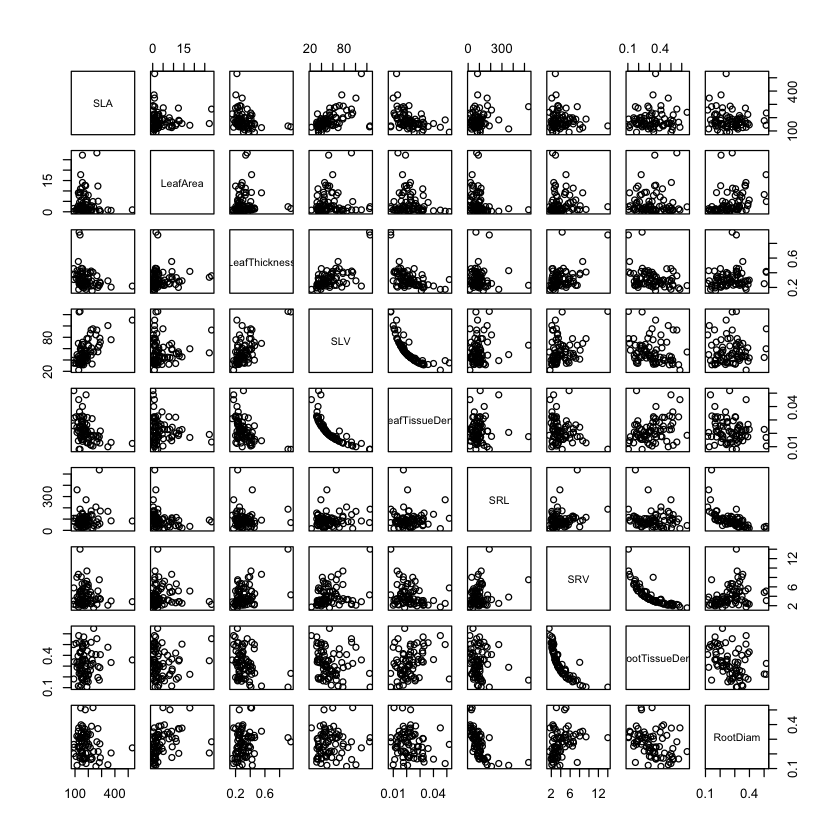

In [16]:
# plot the data
pairs(traits)

#some variables look skewed - log transform all variables
#plot the transformed data

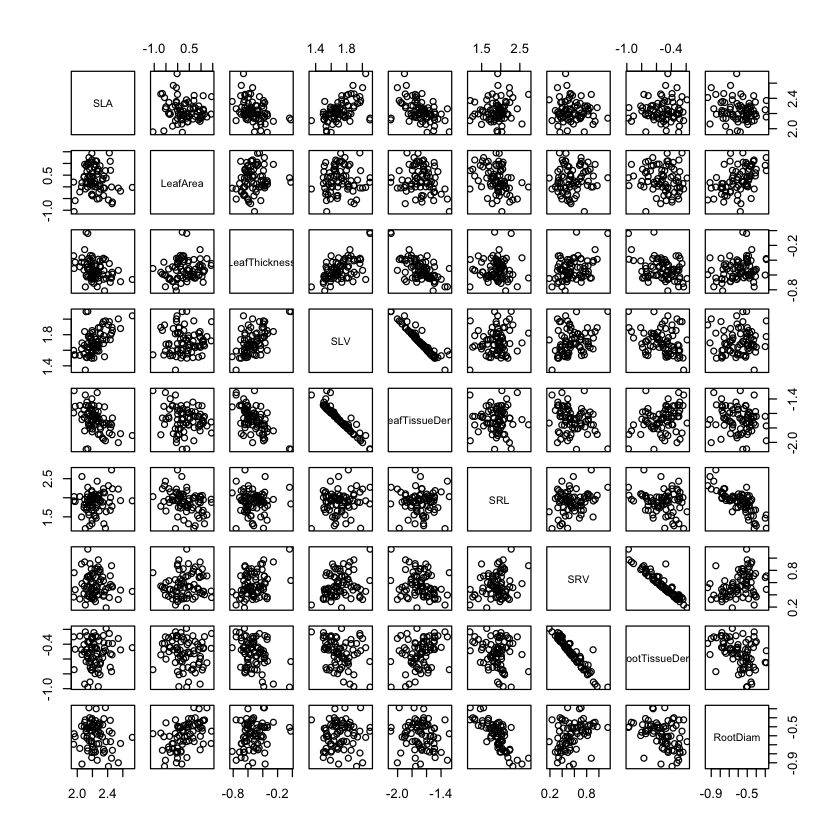

In [17]:
traits <- log10(traits)
pairs(traits)

Following file contains information about the samples, including the habitat and site they were collected from, and a few basic environmental variables such as slope and moisture regime

In [18]:
metadata <- read.csv("grassland_data/plot.metadata.csv", header = TRUE, row.names = 1)
# take a peek at the data
head(metadata)

,habitat,site,slope,aspect,slope.position,rel.moisture
mix-O-1,Mixedgrass,Onefour,0,270,3.0,1
mix-O-2,Mixedgrass,Onefour,20,130,1.5,2
mix-O-3,Mixedgrass,Onefour,5,90,1.0,2
mix-O-4,Mixedgrass,Onefour,5,40,2.0,1
mix-O-5,Mixedgrass,Onefour,5,130,2.0,1
mix-O-6,Mixedgrass,Onefour,1,90,3.0,1


# Phylogency

If you have a phylogeny in the commonly used Newick or Nexus format it can be imported into R with the read.tree or read.nexus functions.

In [19]:
phy <- read.tree("grassland_data/grassland.phylogeny.newick")
class(phy)

[1] "phylo"

#how many tips does our phylogeny have?

In [20]:

Ntip(phy)

[1] 76

#plot our phylogeny (the cex argument makes the labels small enough to
#read)

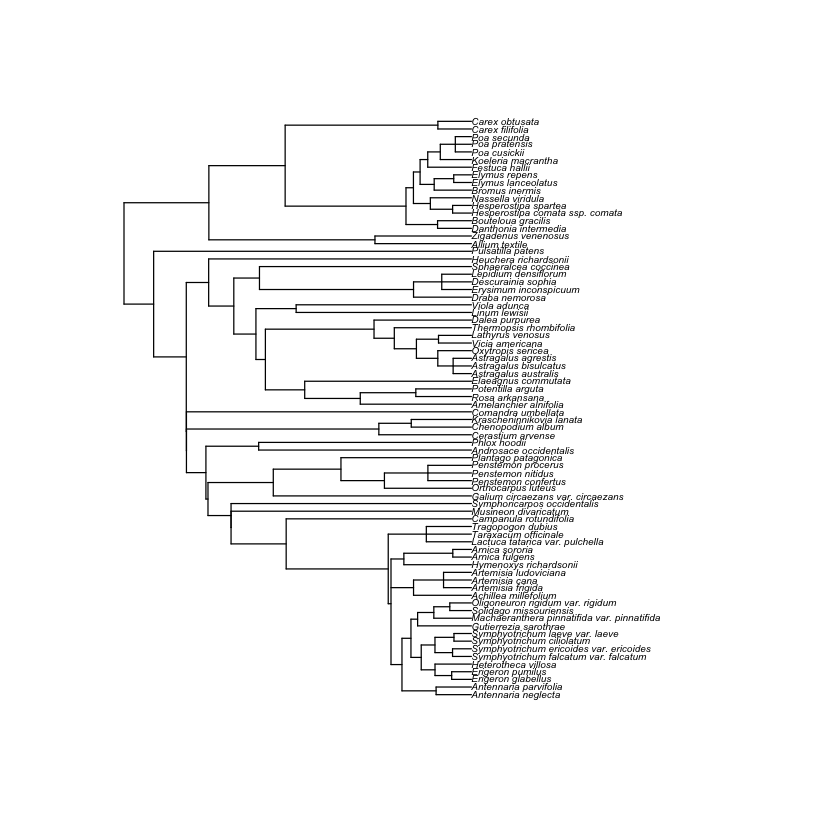

In [21]:
plot(phy, cex = 0.5)

#check for mismatches/missing species
#replace the original data with the sorted/matched data

In [22]:
combined <- match.phylo.comm(phy, comm) 
phy <- combined$phy
comm <- combined$comm

#checking for missmatches/missing species for traits data

In [23]:
combined <- match.phylo.data(phy, traits)
phy <- combined$phy
traits <- combined$data

#check if the data matches with the metadata

In [24]:
all.equal(rownames(comm), rownames(metadata))

[1] TRUE

# Visualization

#compare species richness between rel.moisture 1,2,3

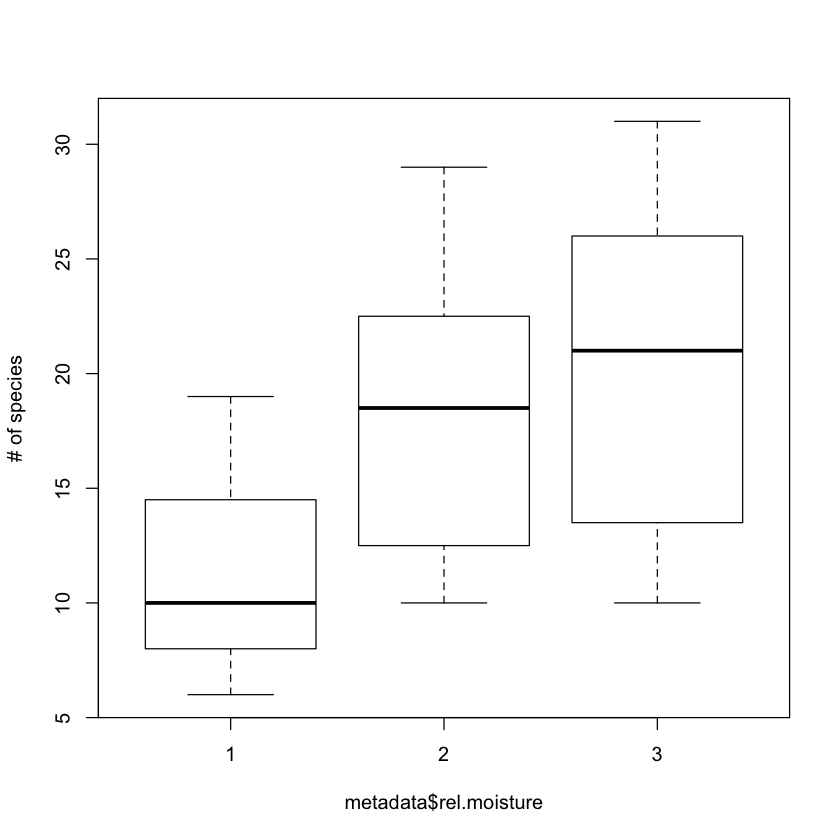

In [26]:
boxplot(specnumber(comm) ~ metadata$rel.moisture, ylab = "# of species")

From the boxplot we can see that rel.moisture level 3 has more richness than compared to level 2 and 1

                      Df Sum Sq Mean Sq F value  Pr(>F)   
metadata$rel.moisture  1  396.2   396.2   10.43 0.00346 **
Residuals             25  949.8    38.0                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

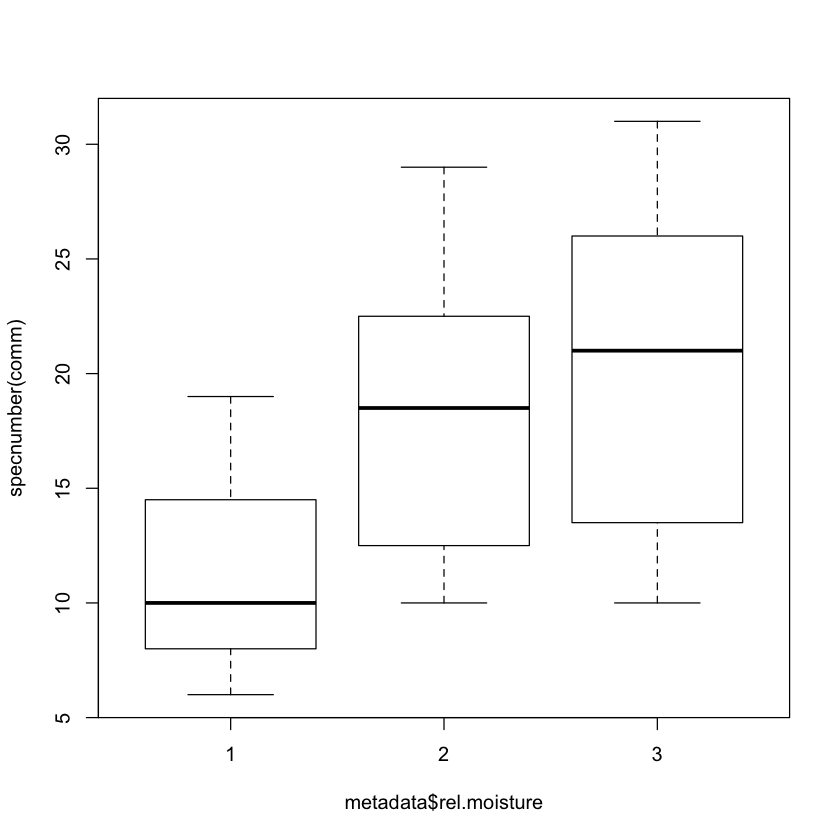

In [32]:
# statistical test of difference
summary(aov(specnumber(comm) ~ metadata$rel.moisture))
boxplot(specnumber(comm) ~ metadata$rel.moisture)

Null Hypothesis is that the three moisture levels have equal means
Alternate Hypothesis is that means are different
Here, p-value is < 0.05 , we reject null hypothesis
Mean of species for each level of moisture is different

#below we plot species accumulion curve across samples

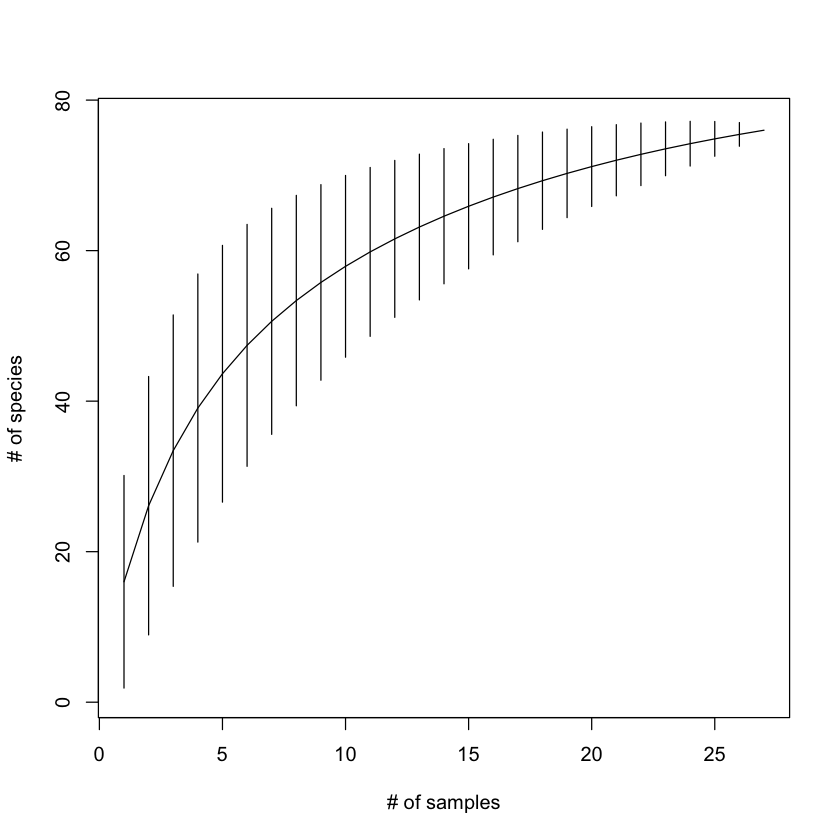

In [33]:
plot(specaccum(comm), xlab = "# of samples", ylab = "# of species")

# Multivariate community analysis

## Hierarchical clustering

#Following will calculate Bray-Curtis dissimilarity among all the samples, an abundance-weighted measure of how 
similar two communities are in terms of their species composition.
#cluster together communities that are similar using an agglomerative hierarchical clustering algorithm.

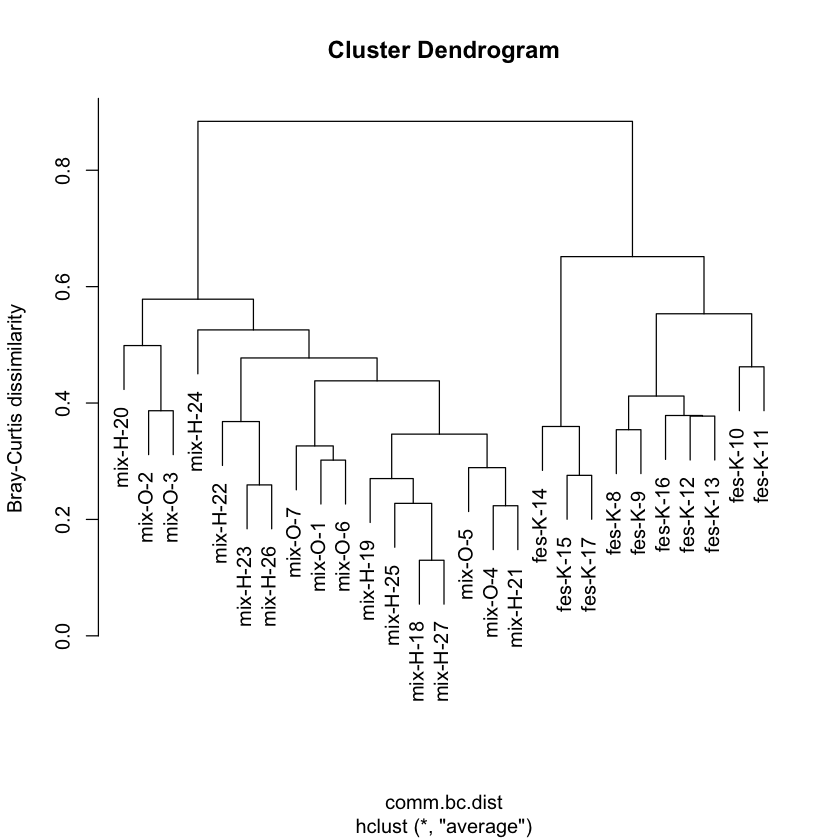

In [34]:
# calculate Bray-Curtis distance among samples
comm.bc.dist <- vegdist(comm, method = "bray")
# cluster communities using average-linkage algorithm
comm.bc.clust <- hclust(comm.bc.dist, method = "average")
# plot cluster diagram
plot(comm.bc.clust, ylab = "Bray-Curtis dissimilarity")

Following we use a non-metric multidimensional(NMDS) scaling to visualize the multivariate structure of these communities.
The goal of NMDS is to collapse information from multiple dimensions.
NMDS uses rank orders, and thus is an extremely flexible technique that can accommodate a variety of different kinds of data.

In [37]:
comm.bc.mds <- metaMDS(comm, dist = "bray")

Run 0 stress 0.07174232 
Run 1 stress 0.07377276 
Run 2 stress 0.08063064 
Run 3 stress 0.07869152 
Run 4 stress 0.07480961 
Run 5 stress 0.0794151 
Run 6 stress 0.07173996 
... New best solution
... Procrustes: rmse 0.0003905141  max resid 0.001765493 
... Similar to previous best
Run 7 stress 0.07344513 
Run 8 stress 0.07173989 
... New best solution
... Procrustes: rmse 0.0004788569  max resid 0.002172887 
... Similar to previous best
Run 9 stress 0.07869136 
Run 10 stress 0.07941512 
Run 11 stress 0.07480958 
Run 12 stress 0.07914173 
Run 13 stress 0.08188746 
Run 14 stress 0.08269273 
Run 15 stress 0.07174046 
... Procrustes: rmse 0.0006134899  max resid 0.002785977 
... Similar to previous best
Run 16 stress 0.07886624 
Run 17 stress 0.07173973 
... New best solution
... Procrustes: rmse 0.0003678883  max resid 0.00166157 
... Similar to previous best
Run 18 stress 0.09124827 
Run 19 stress 0.07174126 
... Procrustes: rmse 0.0003898139  max resid 0.001784813 
... Similar to previ

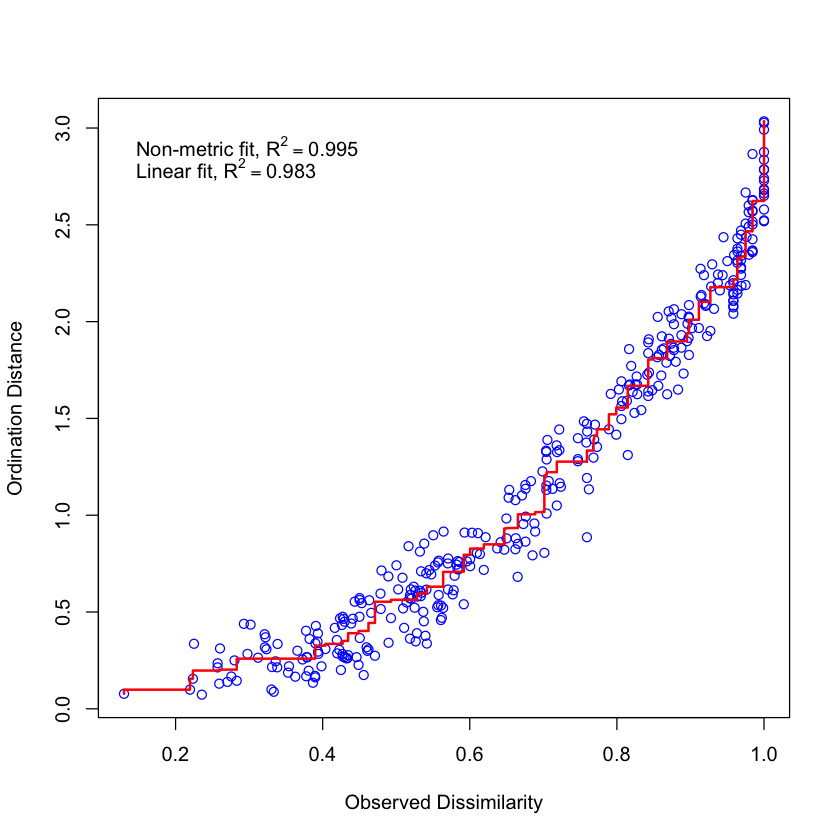

In [38]:
# Assess goodness of ordination fit (stress plot)
stressplot(comm.bc.mds)

Large scatter around the line suggests that original dissimilarities are not well preserved in the reduced number of dimensions. 

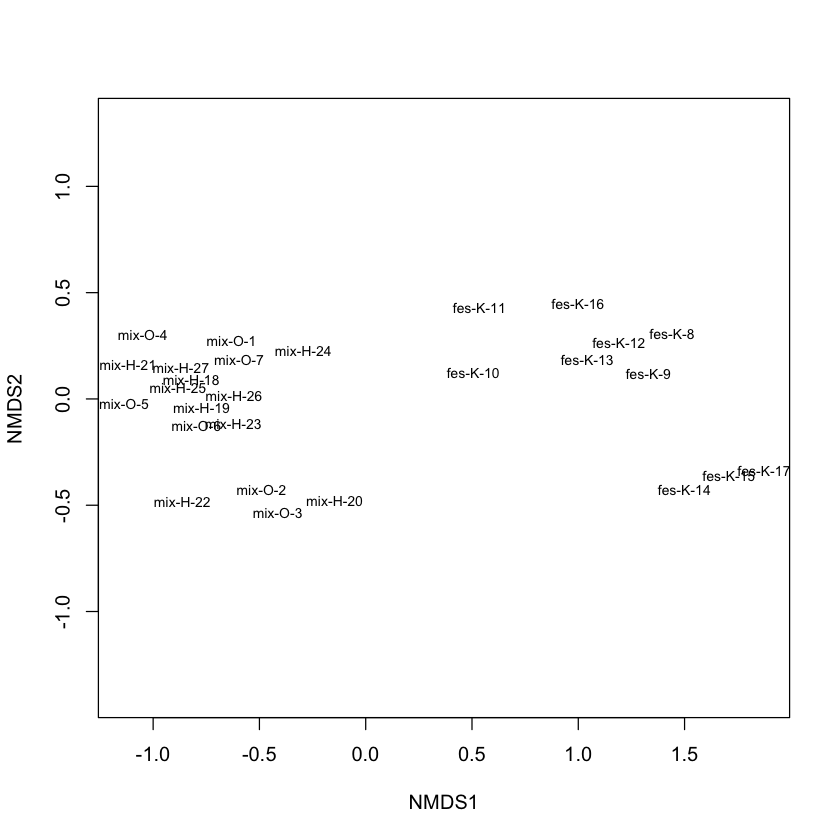

In [81]:
# plot site scores as text
ordiplot(comm.bc.mds, display = "sites", type = "text")

In [ ]:
# automated plotting of results - tries to eliminate overlapping labels
ordipointlabel(comm.bc.mds)

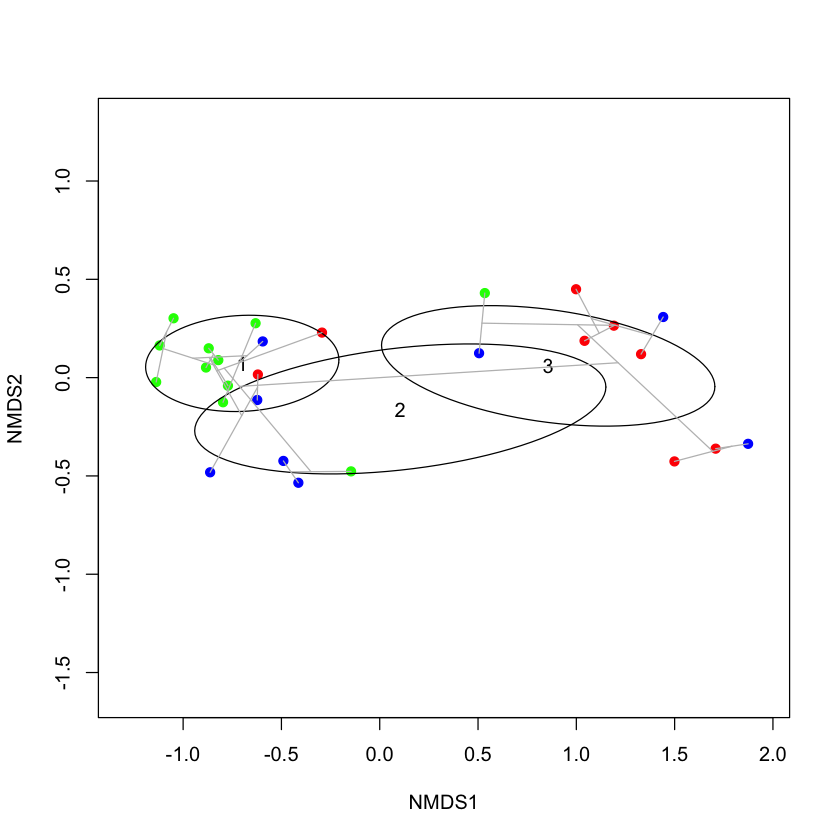

In [79]:
# ordination plots are highly customizable set up the plotting area but
# don't plot anything yet
mds.fig <- ordiplot(comm.bc.mds, type = "none")
# plot just the samples, colour by rel.moisture, pch=19 means plot a circle
points(mds.fig, "sites", pch = 19, col = "green", select = metadata$rel.moisture == 1)
points(mds.fig, "sites", pch = 19, col = "blue", select = metadata$rel.moisture == 2)
points(mds.fig, "sites", pch = 19, col = "red", select = metadata$rel.moisture == 3)
# add confidence ellipses around rel.moisture types
ordiellipse(comm.bc.mds, metadata$rel.moisture, label = TRUE)
# overlay the cluster results we calculated earlier
ordicluster(comm.bc.mds, comm.bc.clust, col = "gray")

There is overlap .. They are not much distant

# Trait evolution

## Phylogenetic signal

Phylogenetic signal is a quantitative measure of the degree to which phylogeny predicts the ecological similarity of species. The K statistic is a measure of phylogenetic signal that compares the observed signal in a trait to the signal under a Brownian motion model of trait evolution on a phylogeny (Blomberg et al. 2003). K values of 1 correspond to a Brownian motion process, which implies some degree of phylogenetic signal or conservatism. K values closer to zero correspond to a random or convergent pattern of evolution, while K values greater than 1 indicate strong phylogenetic signal and conservatism of traits. The statistical significance of phylogenetic signal can be evaluated by comparing observed patterns of the variance of independent contrasts of the trait to a null model of shuffling taxa labels across the tips of the phylogeny. These tests are implemented in the Kcalc, phylosignal, and multiPhylosignal functions.


In [51]:
apply(traits, 2, Kcalc, phy)
#Gives measure of phylogenetic signal in these data.

SLA       LeafArea  LeafThickness            SLV LeafTissueDens 
     0.2563107      0.4231067      0.2418525      0.3310724      0.3298808 
           SRL            SRV RootTissueDens       RootDiam 
     0.2290093      0.2698531      0.2544904      0.3150881

# Phylogenetic and trait diversity

# Phylogenetic diversity

Faith's PD is defined as the total branch length spanned by the tree including all species in a local community, optionally including the root node of the phylogeny. The pd function returns two values for each community, Faith's PD and species richness (SR).

In [52]:
# Calculate Faith's PD
comm.pd <- pd(comm, phy)
head(comm.pd)

,PD,SR
mix-O-1,1072.3697,16
mix-O-2,1475.4767,22
mix-O-3,1406.1708,21
mix-O-4,564.5899,6
mix-O-5,783.4028,10
mix-O-6,1028.5796,13


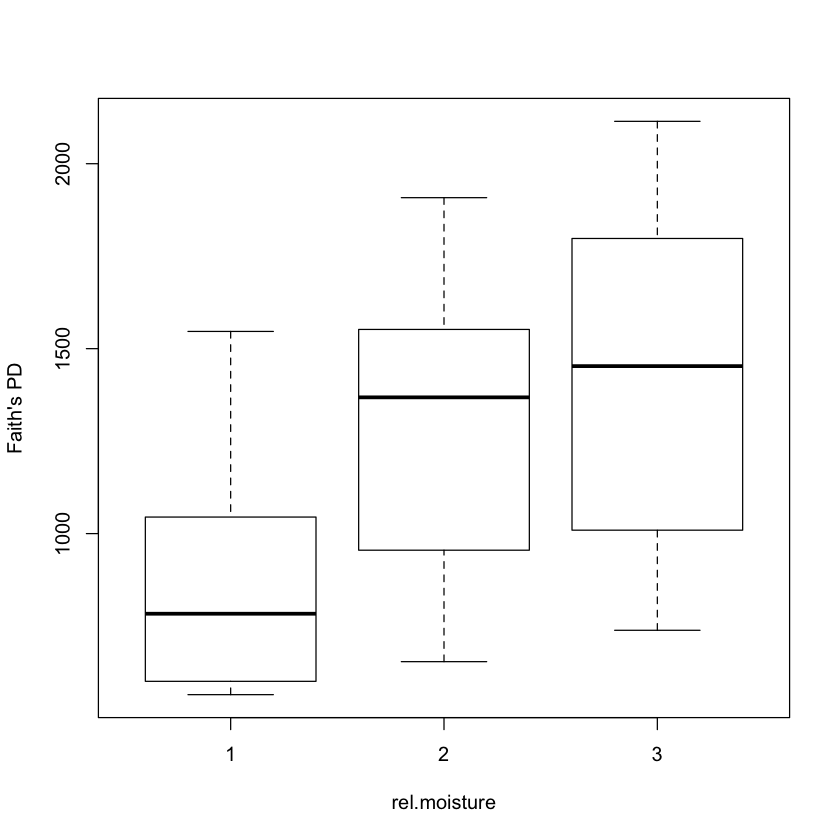

In [53]:
# Plot Faith's PD by rel.moisture
boxplot(comm.pd$PD ~ metadata$rel.moisture, xlab = "rel.moisture", ylab = "Faith's PD")

#Test for PD differences among habitats

In [55]:
summary(aov(comm.pd$PD ~ metadata$rel.moisture))

                      Df  Sum Sq Mean Sq F value  Pr(>F)   
metadata$rel.moisture  1 1559447 1559447   9.769 0.00446 **
Residuals             25 3990846  159634                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

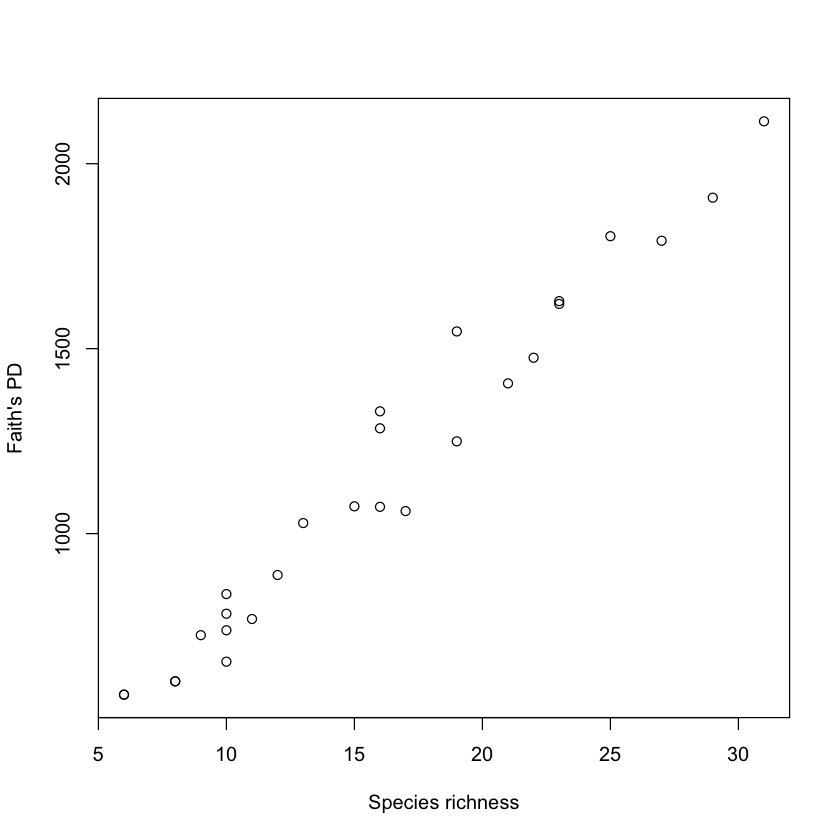

In [56]:
# Compare PD and species richness
plot(comm.pd$PD ~ comm.pd$SR, xlab = "Species richness", ylab = "Faith's PD")

Faith's PD is lower in rel.moisture level 1 than in level 2 and 3. But Faith's PD is highly correlated with species richness.

In [57]:
# convert phylogenety to a distance matrix
phy.dist <- cophenetic(phy)
# calculate ses.mpd
comm.sesmpd <- ses.mpd(comm, phy.dist, null.model = "richness", abundance.weighted = FALSE, 
    runs = 999)
head(comm.sesmpd)

,ntaxa,mpd.obs,mpd.rand.mean,mpd.rand.sd,mpd.obs.rank,mpd.obs.z,mpd.obs.p,runs
mix-O-1,16,231.3054,238.3288,11.625035,232,-0.60416041,0.232,999
mix-O-2,22,239.5479,237.3029,9.488056,535,0.23661064,0.535,999
mix-O-3,21,236.5260,237.8977,9.753923,404,-0.14062514,0.404,999
mix-O-4,6,222.5255,241.5125,22.704147,158,-0.83628115,0.158,999
mix-O-5,10,234.2013,238.9669,16.222624,325,-0.29376124,0.325,999
mix-O-6,13,239.4120,238.4318,14.405060,426,0.06804415,0.426,999


In [58]:
# calculate ses.mntd
comm.sesmntd <- ses.mntd(comm, phy.dist, null.model = "richness", abundance.weighted = FALSE, 
    runs = 999)
head(comm.sesmntd)

,ntaxa,mntd.obs,mntd.rand.mean,mntd.rand.sd,mntd.obs.rank,mntd.obs.z,mntd.obs.p,runs
mix-O-1,16,94.98812,104.27004,19.64352,320,-0.4725182,0.320,999
mix-O-2,22,97.41972,94.54229,15.27889,574,0.1883274,0.574,999
mix-O-3,21,98.71519,95.78532,15.95752,577,0.1836044,0.577,999
mix-O-4,6,136.86094,155.34539,42.01287,342,-0.4399711,0.342,999
mix-O-5,10,107.36711,123.17202,29.21517,295,-0.5409828,0.295,999
mix-O-6,13,118.94915,112.98614,23.85881,608,0.2499291,0.608,999


Positive SES values (mpd.obs.z > 0) and high quantiles (mpd.obs.p > 0.95) indicate phylogenetic evenness, while negative SES values and low quantiles (mpd.obs.p < 0.05) indicate phylogenetic clustering, relative to the null model. MPD is generally thought to be more sensitive to tree-wide patterns of phylogenetic clustering and eveness, while MNTD is more sensitive to patterns of evenness and clustering closer to the tips of the phylogeny.

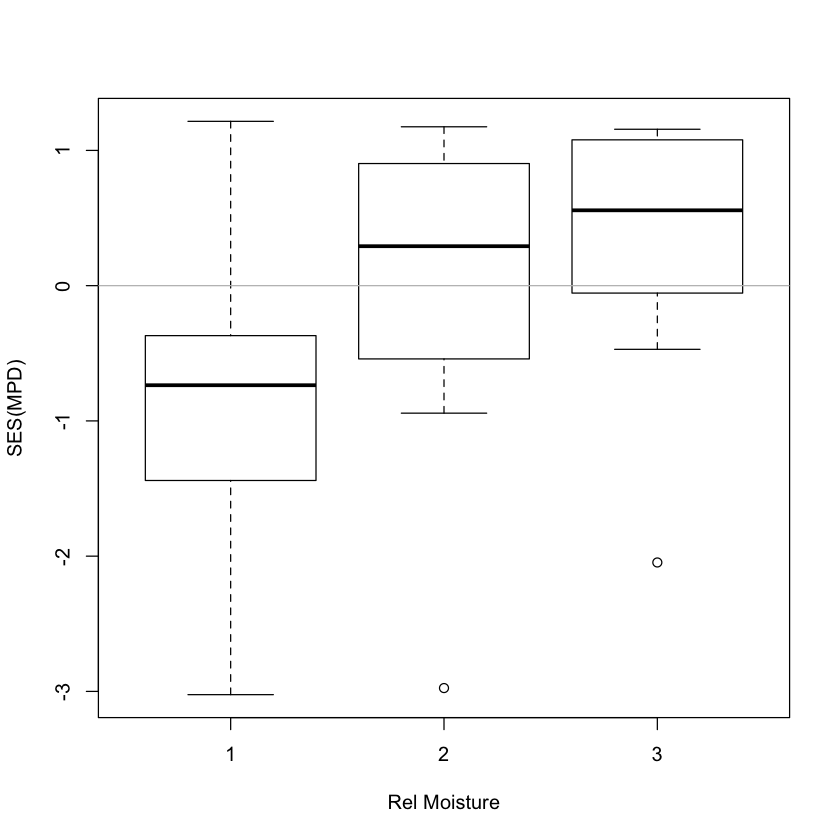

In [64]:
# compare ses.mpd between relative moisture
boxplot(comm.sesmpd$mpd.obs.z ~ metadata$rel.moisture, xlab = "Rel Moisture", ylab = "SES(MPD)")
abline(h = 0, col = "gray")


In [65]:
summary(aov(comm.sesmpd$mpd.obs.z ~ metadata$rel.moisture))

                      Df Sum Sq Mean Sq F value Pr(>F)  
metadata$rel.moisture  1   7.31   7.313   4.984 0.0348 *
Residuals             25  36.68   1.467                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

It looks like plant communities from relative moisture level 2 and 3 are phylogenetically even (SES>0), and communities from relative moisture level 1  are phylogenetically clustered (SES < 0)

In [ ]:
# Trait diversity
#calculate the standardized effect size of functional trait diversity by measuring trait dissimilarity 
#among co-occurring species, and comparing observed trait diversity to a null model.

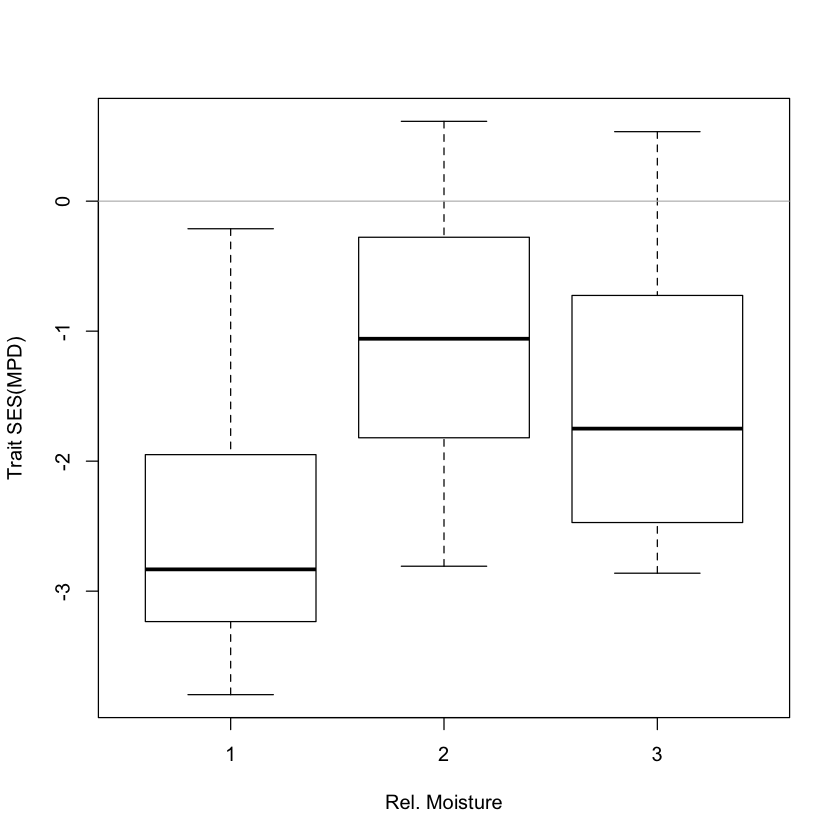

In [67]:
# calculate trait distance - Euclidean distance among scaled trait values -
# we want the full distance matrix
trait.dist <- as.matrix(dist(scale(traits), method = "euclidean"))
# calculate trait ses.mpd
comm.sesmpd.traits <- ses.mpd(comm, trait.dist, null.model = "richness", abundance.weighted = FALSE, 
    runs = 999)
# compare trait ses.mpd between Rel moisture
boxplot(comm.sesmpd.traits$mpd.obs.z ~ metadata$rel.moisture, xlab = "Rel. Moisture", ylab = "Trait SES(MPD)")
abline(h = 0, col = "gray")

In contrast to the pattern we saw for phylogenetic diversity, trait diversity is lower than expected in all three rel.moisture levels (SES_{MPD} < 0), indicating that co-occurring plants have similar leaf and root traits, and this pattern of trait clustering is stronger in relative moisture level=1.

# Phylogenetic beta-diversity
We can measure patterns of phylogenetic relatedness among communities in a manner similar to the within-community phylogenetic diversity measures described above. The unifrac and phylosor functions measure the among-community equivalent of Faith's PD, the total unique/shared branch length between communities. The comdist and comdistnt functions measure the among-community equivalent of MPD and MNTD, the mean pairwise distance or mean nearest taxon distance between pairs of species drawn from two distinct communities.



In [68]:
# calculate phylogenetic MNTD beta diversity
comm.mntd.dist <- comdistnt(comm, phy.dist, abundance.weighted = TRUE)
# calculate functional trait MNTD beta diversity
comm.mntd.traits.dist <- comdistnt(comm, trait.dist, abundance.weighted = TRUE)
# calculate Mantel correlation for taxonomic Bray-Curtis vs. phylogenetic
# MNTD diversity
mantel(comm.bc.dist, comm.mntd.dist)


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = comm.bc.dist, ydis = comm.mntd.dist) 

Mantel statistic r: 0.8597 
      Significance: 0.001 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0722 0.1048 0.1281 0.1743 
Permutation: free
Number of permutations: 999


In [69]:
# calculate Mantel correlation for taxonomic Bray-Curtis vs. trait MNTD
# diversity
mantel(comm.bc.dist, comm.mntd.traits.dist)


Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel(xdis = comm.bc.dist, ydis = comm.mntd.traits.dist) 

Mantel statistic r: 0.9524 
      Significance: 0.001 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0856 0.1256 0.1530 0.1948 
Permutation: free
Number of permutations: 999


## Phylogeny/trait-based ordinations
#compare phylogeny- and trait-based ordinations with the species-based ordination we performed earlier.

species scores not available



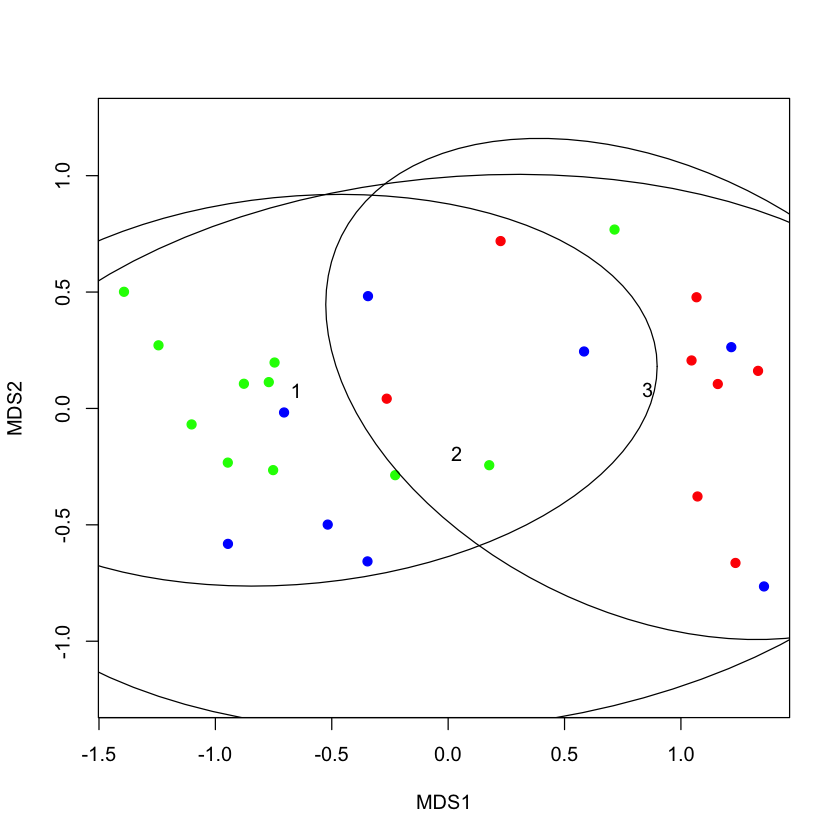

In [70]:
# NMDS ordination of phylogenetic distances - use monoMDS since we only have
# among-sample distances
comm.mntd.mds <- monoMDS(comm.mntd.dist)
# set up the plotting area but don't plot anything yet
mds.fig <- ordiplot(comm.mntd.mds, type = "none")
# plot just the samples, colour by rel.moisture, pch=19 means plot a circle
points(mds.fig, "sites", pch = 19, col = "green", select = metadata$rel.moisture == 
    1)
points(mds.fig, "sites", pch = 19, col = "blue", select = metadata$rel.moisture == 
    2)
points(mds.fig, "sites", pch = 19, col = "red", select = metadata$rel.moisture == 
    3)
# add confidence ellipses around rel.moisture types
ordiellipse(comm.mntd.mds, metadata$rel.moisture, conf = 0.95, label = TRUE)

species scores not available



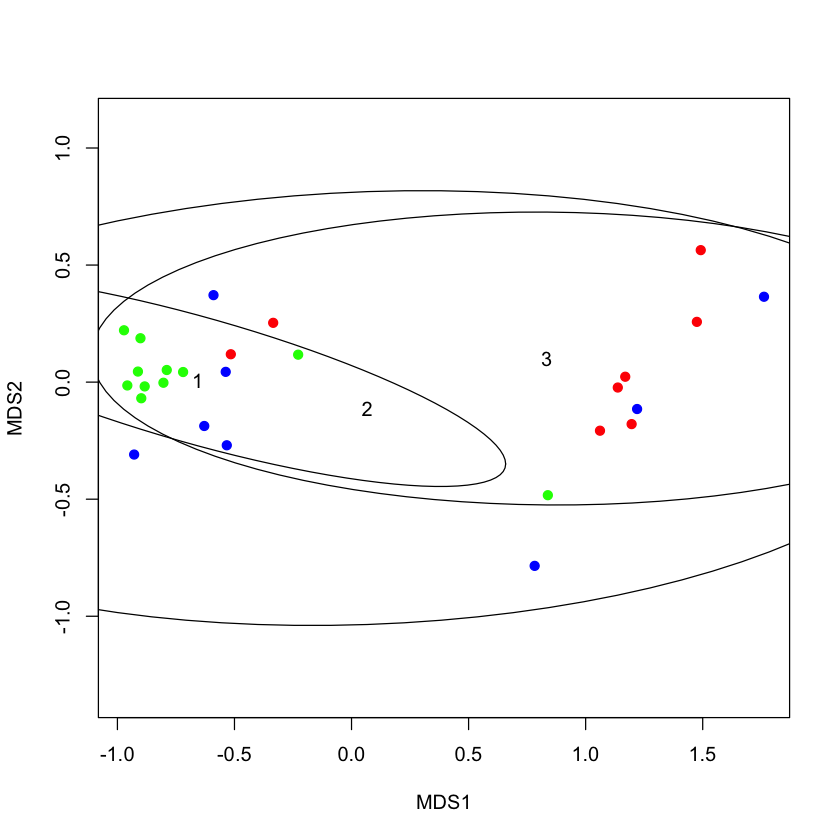

In [72]:
# NMDS ordination of trait distances - use monoMDS since we only have
# among-sample distances
comm.mntd.traits.mds <- monoMDS(comm.mntd.traits.dist)
# set up the plotting area but don't plot anything yet
mds.fig <- ordiplot(comm.mntd.traits.mds, type = "none")
# plot just the samples, colour by rel.moisture, pch=19 means plot a circle
points(mds.fig, "sites", pch = 19, col = "green", select = metadata$rel.moisture == 
    1)
points(mds.fig, "sites", pch = 19, col = "blue", select = metadata$rel.moisture == 
    2)
points(mds.fig, "sites", pch = 19, col = "red", select = metadata$rel.moisture == 
    3)
# add confidence ellipses around rel.moisture types
ordiellipse(comm.mntd.traits.mds, metadata$rel.moisture, conf = 0.95, label = TRUE)

It looks like relative moisture level 1,2 & 3 are not distinct 

Adonis function in vegan allows ANOVA-like tests of the variance in beta diversity explained by categorical or continuous variables.
The degree to which rel.moisture can explain taxonomic, phylogenetic, and trait dissimilarity among grasslands.

In [75]:
adonis(comm.bc.dist ~ rel.moisture, data = metadata)


Call:
adonis(formula = comm.bc.dist ~ rel.moisture, data = metadata) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)   
rel.moisture  1    1.6272  1.6272  7.9959 0.24233  0.002 **
Residuals    25    5.0875  0.2035         0.75767          
Total        26    6.7146                 1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [76]:
# Phylogenetic dissimilarity explained
adonis(comm.mntd.dist ~ rel.moisture, data = metadata)


Call:
adonis(formula = comm.mntd.dist ~ rel.moisture, data = metadata) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

             Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
rel.moisture  1     13461 13460.6  13.097 0.34379  0.001 ***
Residuals    25     25693  1027.7         0.65621           
Total        26     39154                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Relative moisture levels 1,2,3  are not distinct in terms of their taxonomic, phylogenetic, and functional trait diversity.